In [13]:
import pandas as pd

df = pd.read_csv("/home/kkyu/amr_ws/DL/IoT_Project/environment.csv")
df

,Date,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3)
0,2024-03-09 16:46:22,22.5,5.0,152,13.31
1,2024-03-09 16:46:24,22.5,5.0,152,13.31
2,2024-03-09 16:46:26,22.5,5.0,152,13.31
3,2024-03-09 16:46:27,22.5,5.0,152,25.04
4,2024-03-09 16:46:28,22.5,5.0,153,12.34
...,...,...,...,...,...
208,2024-03-09 16:49:57,22.9,5.0,153,11.36
209,2024-03-09 16:49:58,22.9,5.0,153,11.36
210,2024-03-09 16:49:59,22.9,5.0,152,11.36
211,2024-03-09 16:50:00,22.9,5.0,152,12.34


In [14]:
import numpy as np 
# 'Place' 컬럼 추가하고 1~5 랜덤값 할당
df['Place'] = np.random.randint(1, 6, size=len(df))

df

,Date,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3),Place
0,2024-03-09 16:46:22,22.5,5.0,152,13.31,3
1,2024-03-09 16:46:24,22.5,5.0,152,13.31,1
2,2024-03-09 16:46:26,22.5,5.0,152,13.31,3
3,2024-03-09 16:46:27,22.5,5.0,152,25.04,5
4,2024-03-09 16:46:28,22.5,5.0,153,12.34,3
...,...,...,...,...,...,...
208,2024-03-09 16:49:57,22.9,5.0,153,11.36,3
209,2024-03-09 16:49:58,22.9,5.0,153,11.36,3
210,2024-03-09 16:49:59,22.9,5.0,152,11.36,5
211,2024-03-09 16:50:00,22.9,5.0,152,12.34,1


### Highest and Lowest AQI value of Places

In [15]:
df = df.set_index("Date")
df

,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3),Place
Date,,,,,
2024-03-09 16:46:22,22.5,5.0,152,13.31,3
2024-03-09 16:46:24,22.5,5.0,152,13.31,1
2024-03-09 16:46:26,22.5,5.0,152,13.31,3
2024-03-09 16:46:27,22.5,5.0,152,25.04,5
2024-03-09 16:46:28,22.5,5.0,153,12.34,3
...,...,...,...,...,...
2024-03-09 16:49:57,22.9,5.0,153,11.36,3
2024-03-09 16:49:58,22.9,5.0,153,11.36,3
2024-03-09 16:49:59,22.9,5.0,152,11.36,5


In [16]:
# 'AQI' 컬럼 생성
df['AQI'] = 0

# for loop를 사용하여 각 행에 대한 AQI 값 계산 및 할당
for index, row in df.iterrows():
    PM_10_value = row['PM-10 (μg/m3)']
    AQI_value = ((100 - 51) / (80 - 31)) * (PM_10_value - 31) + 51
    df.at[index, 'AQI'] = AQI_value

df

/tmp/ipykernel_13570/3247769390.py:8: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '33.31' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3),Place,AQI
Date,,,,,,
2024-03-09 16:46:22,22.5,5.0,152,13.31,3,33.31
2024-03-09 16:46:24,22.5,5.0,152,13.31,1,33.31
2024-03-09 16:46:26,22.5,5.0,152,13.31,3,33.31
2024-03-09 16:46:27,22.5,5.0,152,25.04,5,45.04
2024-03-09 16:46:28,22.5,5.0,153,12.34,3,32.34
...,...,...,...,...,...,...
2024-03-09 16:49:57,22.9,5.0,153,11.36,3,31.36
2024-03-09 16:49:58,22.9,5.0,153,11.36,3,31.36
2024-03-09 16:49:59,22.9,5.0,152,11.36,5,31.36


In [17]:
# 'AQI_Bucket' 컬럼 생성 및 값 할당
df['AQI_Bucket'] = pd.cut(df['AQI'], bins=[0, 50, 100, 250, 500], labels=['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy'])

df

,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3),Place,AQI,AQI_Bucket
Date,,,,,,,
2024-03-09 16:46:22,22.5,5.0,152,13.31,3,33.31,Good
2024-03-09 16:46:24,22.5,5.0,152,13.31,1,33.31,Good
2024-03-09 16:46:26,22.5,5.0,152,13.31,3,33.31,Good
2024-03-09 16:46:27,22.5,5.0,152,25.04,5,45.04,Good
2024-03-09 16:46:28,22.5,5.0,153,12.34,3,32.34,Good
...,...,...,...,...,...,...,...
2024-03-09 16:49:57,22.9,5.0,153,11.36,3,31.36,Good
2024-03-09 16:49:58,22.9,5.0,153,11.36,3,31.36,Good
2024-03-09 16:49:59,22.9,5.0,152,11.36,5,31.36,Good


In [18]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# 서브플롯 생성
fig = make_subplots(rows=1, cols=5, subplot_titles=['Place 1', 'Place 2', 'Place 3', 'Place 4', 'Place 5'])

# 각 장소에 대한 AQI 분포 히스토그램 추가
# y축은 빈도수를 나타냄
for i, place in enumerate(range(1, 6), start=1):
    trace = go.Histogram(x=df[df['Place'] == place]['AQI'], name=f'Place {place}')
    fig.add_trace(trace, row=1, col=i)

# 레이아웃 설정
fig.update_layout(title_text="각 Place의 AQI 분포", showlegend=False)

# 그래프 출력
fig.show()


In [19]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# 서브플롯 생성
fig = make_subplots(rows=1, cols=1)

# 각 장소별로 AQI 지표를 상자 그림으로 추가
box_traces = []
for place in range(1, 6):
    box_trace = go.Box(y=df[df['Place'] == place]['AQI'], name=f'Place {place}', boxmean=True)
    box_traces.append(box_trace)

# 상자 그림을 서브플롯에 추가
for trace in box_traces:
    fig.add_trace(trace)

fig.update_layout(title_text="각 Place의 AQI 지표")
fig.show()


In [20]:
# 각 장소별 AQI 버킷의 빈도수 계산
freq_data = df.groupby(['Place', 'AQI_Bucket']).size().unstack(fill_value=0)

# 막대 그래프 생성
fig = go.Figure()

for place in range(1, 6):
    fig.add_trace(go.Bar(x=freq_data.columns, y=freq_data.loc[place], name=f'Place {place}'))

# 레이아웃 설정
fig.update_layout(barmode='stack', title="각 장소별 AQI 버킷의 빈도수", xaxis_title="AQI 버킷", yaxis_title="빈도수")

# 그래프 출력
fig.show()

/tmp/ipykernel_13570/1030527442.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [34]:
# 각 장소별 평균 AQI 계산
avg_aqi = df.groupby('Place')['AQI'].mean().reset_index()

# Pie chart 생성
fig = px.pie(avg_aqi, values='AQI', names='Place', title='Major Place Average AQI')

fig.show()

In [33]:
import plotly.express as px

# 각 장소별 평균 AQI 계산
avg_aqi = df.groupby('Place')['AQI'].mean().reset_index()

# Line chart 생성
fig = px.line(avg_aqi, x='Place', y='AQI', title='각 Place를 별 AQI 지표', markers=True)

fig.show()


/tmp/ipykernel_13570/1144147057.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




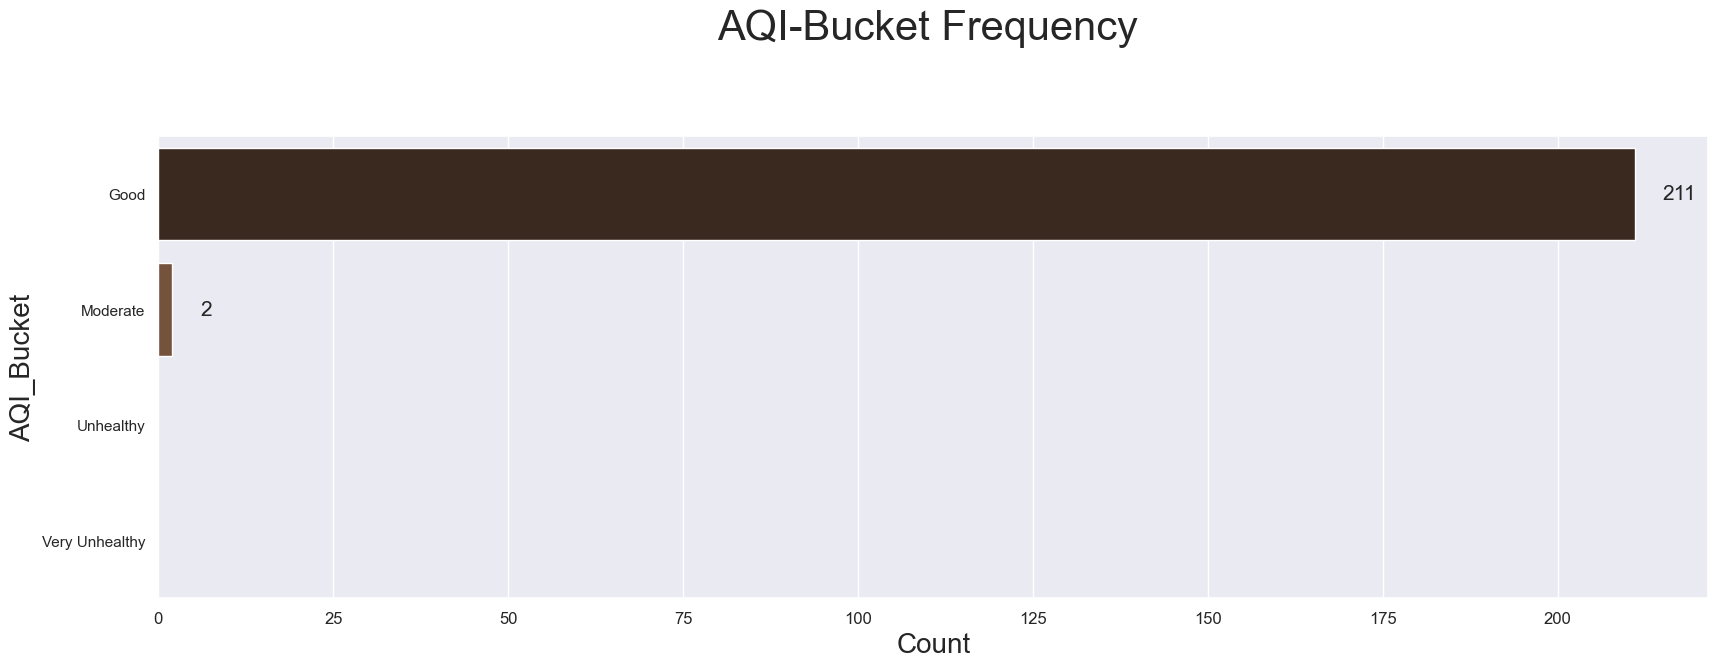

In [40]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import koreanize_matplotlib

sns.set(rc={'figure.figsize':(20,6)})
plt.xticks(fontsize=12)
p = sns.countplot(y=df['AQI_Bucket'], order=df['AQI_Bucket'].value_counts().index, palette='copper')
p.set_xlabel('Count', fontsize=20)
p.set_ylabel('AQI_Bucket', fontsize=20)
for container in p.containers:
    p.bar_label(container, label_type='edge', padding=20, fontsize=15, rotation=0)
p.axes.set_title("AQI-Bucket Frequency \n\n", fontsize=30)
plt.show()


/tmp/ipykernel_13570/3372702077.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




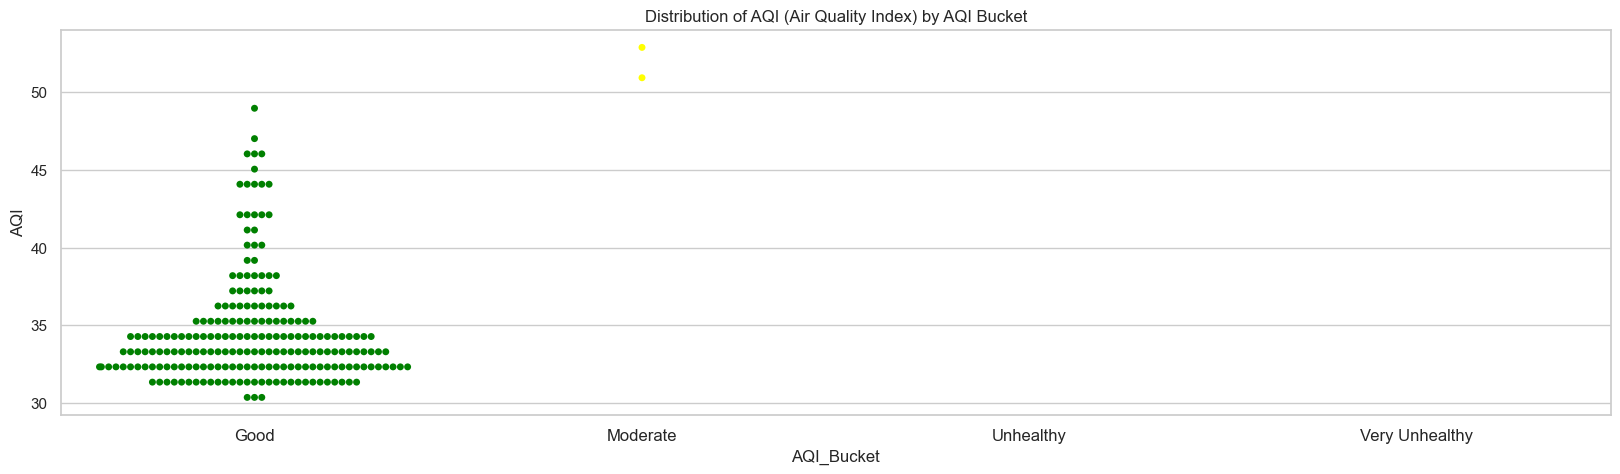

In [44]:
sns.set(rc={'figure.figsize':(20,5)})

# Set the style and palette
sns.set_style("whitegrid")
palette = {"Good": "green", 
           "Moderate": "yellow",
           "Unhealthy for Sensitive Groups": "orange",
           "Unhealthy": "red",
           "Very Unhealthy": "darkred"}

sns.swarmplot(data=df, x=df['AQI_Bucket'], y='AQI', order=['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy'], palette=palette)

plt.title('Distribution of AQI (Air Quality Index) by AQI Bucket')
plt.xticks(fontsize=12)

plt.show()


/tmp/ipykernel_13570/1477228242.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'AQI Values Distribution')

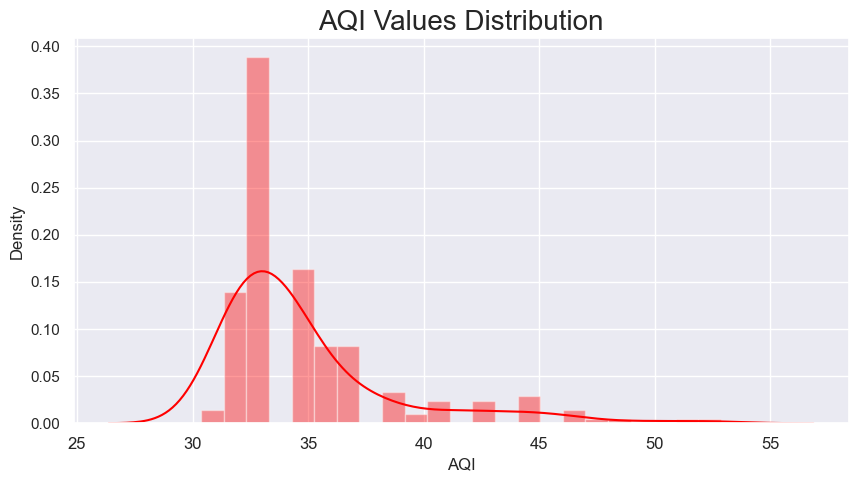

In [45]:
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(fontsize=12)
p=sns.distplot(df['AQI'],color='Red')
p.axes.set_title("AQI Values Distribution",fontsize=20)

/tmp/ipykernel_13570/4026923081.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




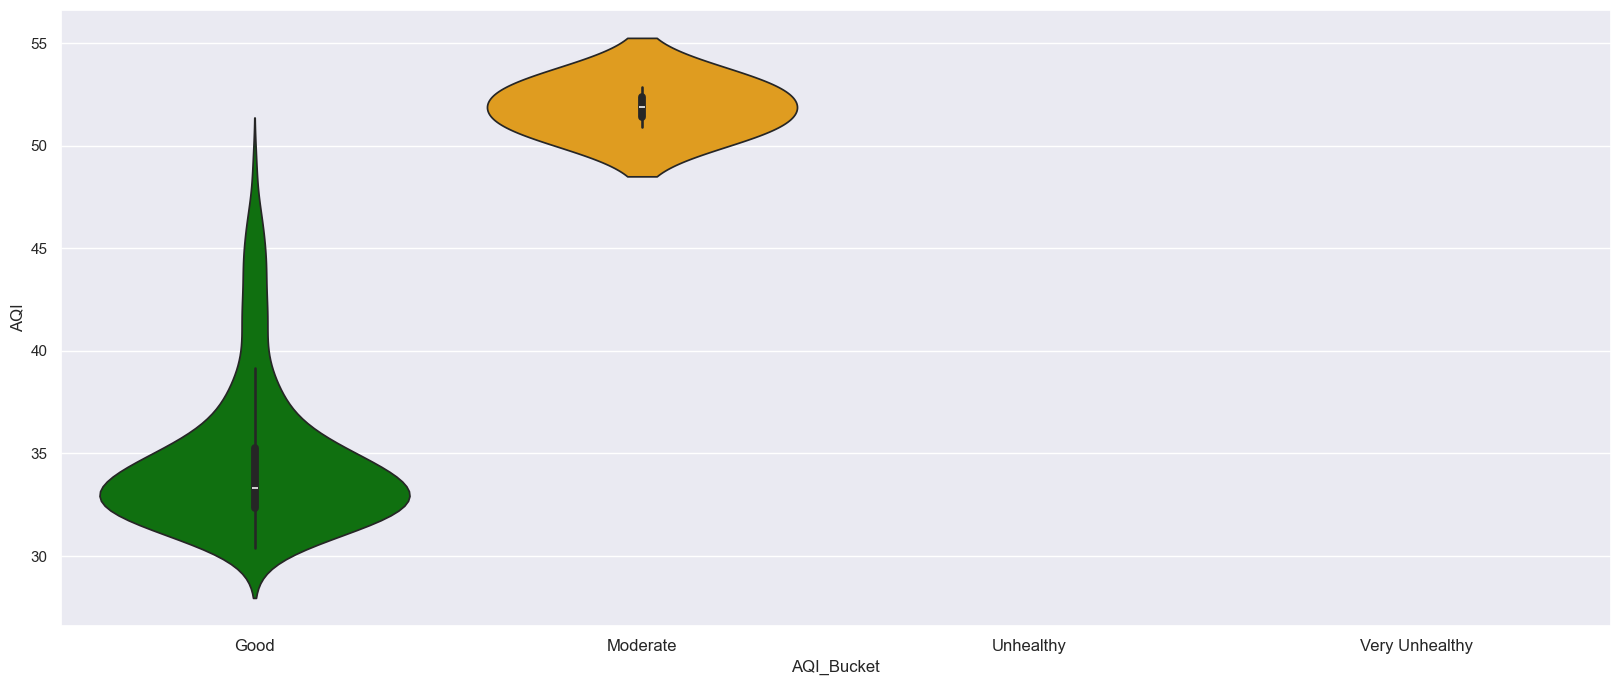

In [53]:
sns.set(rc={'figure.figsize':(20,8)})
plt.xticks(fontsize=12)

df['AQI'] = pd.to_numeric(df['AQI'])
custom_palette = {'Good': 'green', 'Moderate': 'orange', 'Unhealthy': 'red', 'Very Unhealthy': 'purple'}

sns.violinplot(data=df, x=df['AQI_Bucket'], y=df['AQI'], order=['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy'], palette=custom_palette)
plt.show()

/tmp/ipykernel_13570/2212624895.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




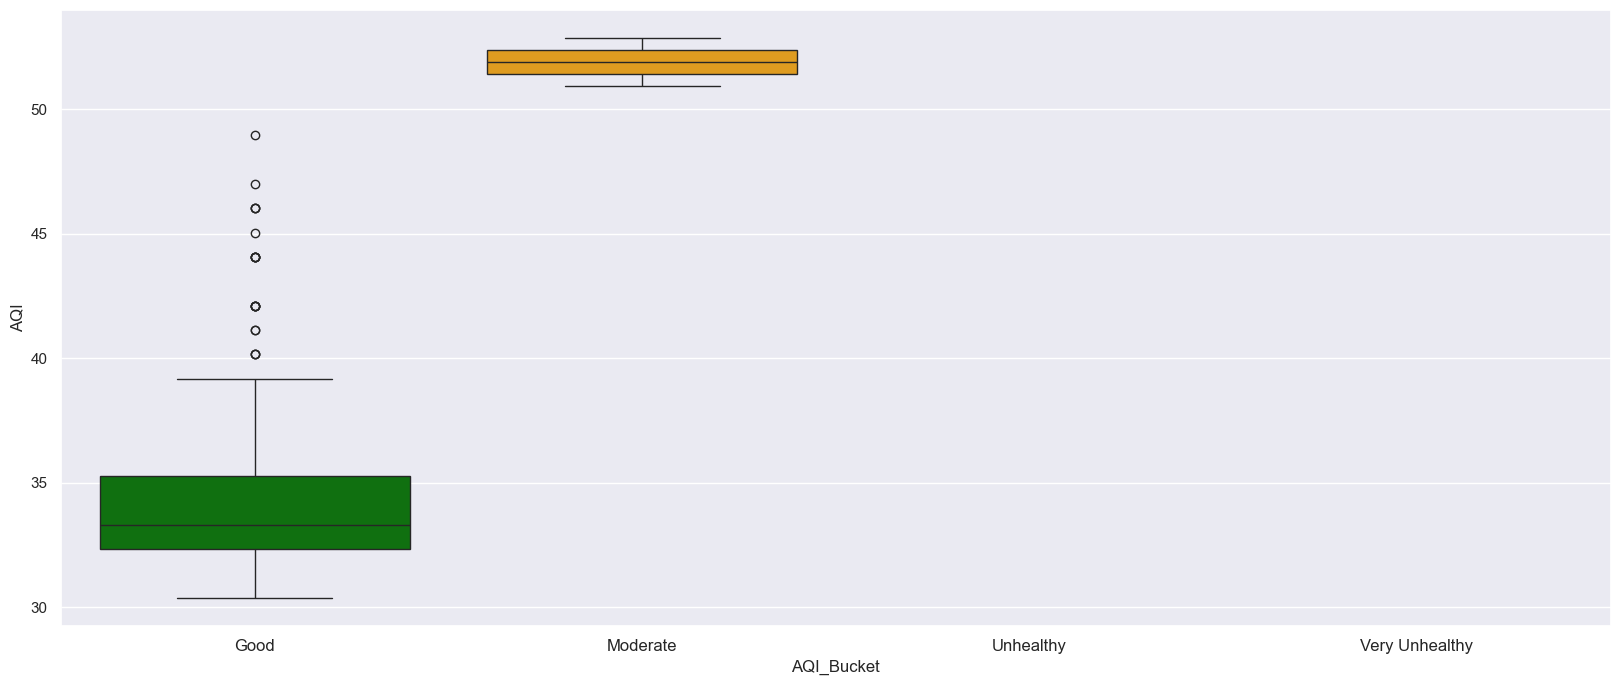

In [54]:
sns.set(rc={'figure.figsize':(20,8)})
plt.xticks(fontsize=12)

df['AQI'] = pd.to_numeric(df['AQI'])
custom_palette = {'Good': 'green', 'Moderate': 'orange', 'Unhealthy': 'red', 'Very Unhealthy': 'purple'}

sns.boxplot(data=df, x=df['AQI_Bucket'], y=df['AQI'], order=['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy'], palette=custom_palette)
plt.show()